In [5]:
## 选择A10 染色体互作TAD 互作 cliques
import pandas as pd
df = pd.read_csv('F:/TM-1_leaf_3D-genome/Pore-C/TAD/TAD_cliques/Pore_C_TAD_50_005_node.txt', sep='\t', names=['source', 'target', 'weight'])
df_chr5 = df.query("source.str.contains('D01')", engine='python')
df_chr5.to_csv("F:/TM-1_leaf_3D-genome/Pore-C/TAD/TAD_cliques/Pore_C_TAD_50_005_node_D01.txt", sep='\t', index=False)

In [6]:
import pandas as pd
df = pd.read_csv('F:/TM-1_leaf_3D-genome/HiC/TAD/Cliques/method2/TM1_leaf_TAD_node.txt', sep='\t', names=['source', 'target', 'weight'])
df_chr5 = df.query("source.str.contains('D01')", engine='python')
df_chr5.to_csv("F:/TM-1_leaf_3D-genome/HiC/TAD/Cliques/method2/TM1_leaf_TAD_node_D01.txt", sep='\t', index=False)

In [10]:
## 选择A10 compartment 的pca1 值
# import pandas as pd
# df = pd.read_csv('F:/TM-1_leaf_3D-genome/Pore-C/cpt/pac1_HiC_pore-c_normalization.txt', sep='\t')
# df_chr10 = df.query("c.str.contains('A10')", engine='python')
# df_chr10.to_csv("F:/TM-1_leaf_3D-genome/Pore-C/cpt/pca1_hic_pore-c_normalization_A10.txt", sep='\t', index=False)'

import pandas as pd
df = pd.read_csv('F:/TM-1_leaf_3D-genome/Pore-C/cpt/pac1_HiC_pore-c.txt', sep='\t')
df_chr10 = df.query("c.str.contains('A10')", engine='python')
df_chr10.to_csv("F:/TM-1_leaf_3D-genome/Pore-C/cpt/pca1_hic_pore-c_A10.txt", sep='\t', index=False)

In [12]:
## 选择A04 insolution score 的值
import pandas as pd
df = pd.read_csv('F:/TM-1_leaf_3D-genome/Pore-C/TAD/is_relevance/is_hic_porec.bed', sep='\t')
df_chr04 = df.query("c.str.contains('A04')", engine='python')
df_chr04.to_csv("F:/TM-1_leaf_3D-genome/Pore-C/TAD/is_relevance/is_hic_porec_A04.bed", sep='\t',index=False)

In [ ]:
import pandas as pd
import sys
input_f = sys.argv[1]
output_f = sys.argv[2]
df = pd.read.csv(input_f, sep="\t", names=['c', 's', 'e'])
df_out = df.groupby(by=['c', 's'], as_index=False)['e'].agg("sum")
df_out.to_csv(output_f, sep="\t", index=False, header=False)

In [26]:
## 数据格式转换
import pandas as pd
names = 'F:/Multip_species_3Dgenome/Hi-C/eqtl_loop/Chr05_example/juicebox/J85_4DPA_Chr05_90700000_90760000_loop'
#names = 'F:/Multip_species_3Dgenome/Hi-C/eqtl_loop/Chr05_example/juicebox/J85_12DPA_Chr05_90700000_90760000_loop'
#names = 'F:/Multip_species_3Dgenome/Hi-C/eqtl_loop/Chr05_example/juicebox/J85_20DPA_Chr05_90700000_90760000_loop'
#names = 'F:/Multip_species_3Dgenome/Hi-C/eqtl_loop/Chr05_example/juicebox/J98_4DPA_Chr05_90700000_90760000_loop'
#names = 'F:/Multip_species_3Dgenome/Hi-C/eqtl_loop/Chr05_example/juicebox/J98_12DPA_Chr05_90700000_90760000_loop'
#names = 'F:/Multip_species_3Dgenome/Hi-C/eqtl_loop/Chr05_example/juicebox/J98_20DPA_Chr05_90700000_90760000_loop'

input_f = names + ".arcs"
output_f = names + ".bedpe"
df = pd.read_csv(input_f, sep = "\t", names = ['c1', 's1', 'e1', 'c2', 's2', 'e2', 't'])
df['z1'] = df['s1'] - 2500
df['k1'] = df['s1'] + 2500
df['z2'] = df['s2'] - 2500
df['k2'] = df['s2'] + 2500
df['one'] = ['.']*df.shape[0]
df['two'] = ['.']*df.shape[0]
df['three'] = ['.']*df.shape[0]
df['four'] = ['.']*df.shape[0]
df['five'] = ['255,255,170']*df.shape[0]
df_out = df[['c1','z1','k1','c2','z2','k2','one','two','three','four', 'five']].copy()
df_tmp = pd.DataFrame([{'c1':'Chr05', 'z1':'90700000', 'k1':'90760000','c2':'Chr05', 'z2':'90700000', 'k2':'90760000', 'one': '.', 'two':'.', 'three':'.', 'four': '.', 'five':'255,255,170'}])
df_out = df_out.append(df_tmp, ignore_index=True)
#df_out.iloc[df_out.shape[0]] = ['Chr05', '90700000', '90760000', 'Chr05', '90700000', '90760000', '.', '.', '.', '255,126,170']
df_out.to_csv(output_f, sep='\t',index=False)


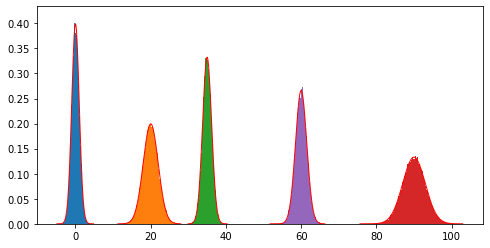

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[8,4])
#ax = fig.add_subplot(121)
mu, sigma = 0, 1 # mean and standard deviation 正态分布（Normal distribution）又名高斯分布（Gaussian distribution）
# 若随机变量X服从一个数学期望为μ、标准方差为σ2的高斯分布，记为：X∼N(μ,σ2), 正态分布的期望值μ决定了其位置，其标准差σ决定了分布的幅度。
# 我们通常所说的标准正态分布是μ = 0,σ = 1的正态分布（见右图中绿色曲线）。


s = np.random.normal(mu, sigma, 100000)
abs(mu - np.mean(s)) < 0.01
abs(sigma - np.std(s, ddof=1)) < 0.01

#count, bins, ignored = plt.hist(s, 300, density=True) # hist　是　Plot a histogram.　柱状图的意思
count, bins, ignored = plt.hist(s, 300, density=True)

x = bins
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) )

c = plt.plot(x, y, linewidth=1, color='r')
ax.add_callback(c)


mu, sigma = 20,2 # mean and standard deviation 正态分布（Normal distribution）又名高斯分布（Gaussian distribution）
# 若随机变量X服从一个数学期望为μ、标准方差为σ2的高斯分布，记为：X∼N(μ,σ2), 正态分布的期望值μ决定了其位置，其标准差σ决定了分布的幅度。
# 我们通常所说的标准正态分布是μ = 0,σ = 1的正态分布（见右图中绿色曲线）。
s = np.random.normal(mu, sigma, 100000)
#count, bins, ignored = plt.hist(s, 300, density=True) # hist　是　Plot a histogram.　柱状图的意思
count, bins, ignored = plt.hist(s, 300, density=True)
x = bins
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) )
z = plt.plot(x, y, linewidth=1, color='r')
ax.add_callback(z)


mu, sigma = 35,1.2 # mean and standard deviation 正态分布（Normal distribution）又名高斯分布（Gaussian distribution）
# 若随机变量X服从一个数学期望为μ、标准方差为σ2的高斯分布，记为：X∼N(μ,σ2), 正态分布的期望值μ决定了其位置，其标准差σ决定了分布的幅度。
# 我们通常所说的标准正态分布是μ = 0,σ = 1的正态分布（见右图中绿色曲线）。
s = np.random.normal(mu, sigma, 100000)
#count, bins, ignored = plt.hist(s, 300, density=True) # hist　是　Plot a histogram.　柱状图的意思
count, bins, ignored = plt.hist(s, 300, density=True)
x = bins
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) )
h = plt.plot(x, y, linewidth=1, color='r')
ax.add_callback(h)

mu, sigma = 90,3 # mean and standard deviation 正态分布（Normal distribution）又名高斯分布（Gaussian distribution）
# 若随机变量X服从一个数学期望为μ、标准方差为σ2的高斯分布，记为：X∼N(μ,σ2), 正态分布的期望值μ决定了其位置，其标准差σ决定了分布的幅度。
# 我们通常所说的标准正态分布是μ = 0,σ = 1的正态分布（见右图中绿色曲线）。
s = np.random.normal(mu, sigma, 100000)
#count, bins, ignored = plt.hist(s, 300, density=True) # hist　是　Plot a histogram.　柱状图的意思
count, bins, ignored = plt.hist(s, 300, density=True)
x = bins
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) )
k = plt.plot(x, y, linewidth=1, color='r')
ax.add_callback(k)
mu, sigma = 60,1.5 # mean and standard deviation 正态分布（Normal distribution）又名高斯分布（Gaussian distribution）
# 若随机变量X服从一个数学期望为μ、标准方差为σ2的高斯分布，记为：X∼N(μ,σ2), 正态分布的期望值μ决定了其位置，其标准差σ决定了分布的幅度。
# 我们通常所说的标准正态分布是μ = 0,σ = 1的正态分布（见右图中绿色曲线）。
s = np.random.normal(mu, sigma, 100000)
#count, bins, ignored = plt.hist(s, 300, density=True) # hist　是　Plot a histogram.　柱状图的意思
count, bins, ignored = plt.hist(s, 300, density=True)
x = bins
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) )
k = plt.plot(x, y, linewidth=1, color='r')
ax.add_callback(k)
ax.annotate("",
            xy=(1, 0),
            xytext=(20, 0),
            size=20, va="center", ha="center",
            arrowprops=dict(color='#373331',
                            arrowstyle="simple",
                            connectionstyle="arc3,rad=0.4",
                            )
            )
plt.savefig('test.pdf')

In [2]:
import pandas as pd
df = pd.read_csv("F:\TM-1_leaf_3D-genome\Pore-C\TAD\TAD_interaction\Pore_C_TAD_50_005_anchor.txt", sep='\t')
df_a = df.query("chrs.str.contains('Ghir_A')", engine="python")
df_d = df.query("chrs.str.contains('Ghir_D')", engine="python")
df_a.to_csv("At.txt", sep='\t', index=False)
df_d.to_csv("Dt.txt", sep='\t', index=False)



In [39]:
## LJ
#-*- coding: utf-8 -*-
import pandas as pd
df = pd.read_csv("F:/Lj/68763.89元 基础设施2021年下半年办公用品供货清单含办公室2022 02 11.txt", sep='\t', encoding="gbk")
df_2 = df[['商品名称','单位']]
df_2.drop_duplicates(keep='first', inplace=True, subset=['商品名称'])
df_2.to_csv("F:/Lj/result2.txt", sep="\t", index=False, encoding="gbk")
#print(df['含税小计元'].sum())
#df_group = df.groupby(["商品名称", "单价", "含增值税单价"], as_index=False)["数量", "含税小计元"].sum()
#print(df_group['含税小计元'].sum())
#df_group.to_csv("F:/Lj/result.txt", sep="\t", index=False, encoding="gbk")

D:\software\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
df_result1 = pd.read_csv("F:/Lj/result2.txt", sep='\t', encoding="gbk")
df_resutl2 = pd.read_csv("F:/Lj/result.txt", sep='\t', encoding="gbk")
df = pd.merge(df_result1, df_resutl2, how='outer',on=['商品名称'])
df.to_csv("F:/Lj/result3.txt", sep='\t', encoding='gbk')

